In [3]:
import glob
import networkx as nx
import os
from karateclub import Graph2Vec
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import defaultdict
import json
import os

In [4]:
l1_dir = "/Users/arjuns/Downloads/notebooks_v2/v2/graphs"

In [5]:
all_graphs = {}

files_with_no_nodes = [
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/learnmachinelearning.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/DataHoarder.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/talesfromtechsupport.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/technews.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/apolloapp.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/ipad.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/onions.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Technology/Windows10.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/AnalogCommunity.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/iWallpaper.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/ImaginaryHorrors.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/pic.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/ArtHistory.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/80s.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/Pyrography.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/blenderhelp.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/MobileWallpaper.json.graphml',
    '/Users/arjuns/Downloads/notebooks_v2/v2/graphs/Art/wallpaperengine.json.graphml'
]

# for each folder in l1_dir, get 100 arbitrary files
for folder in os.listdir(l1_dir):
    if folder == ".DS_Store":
        continue
    all_files = glob.glob(l1_dir + "/" + folder + "/*.graphml")
    # take the 100 smallest files
    all_files.sort(key=os.path.getsize)
    all_files = [f for f in all_files if f not in files_with_no_nodes]
    all_files = all_files
    all_graphs[folder] = all_files

for folder, files in all_graphs.items():
    print(folder, len(files))

Internet Culture and Memes 595
Music 303
Gaming 388
Television 260
Technology 398
Art 230
Funny 150
Business, Economics, and Finance 176
Sports 300
Animals and Pets 378
Learning and Education 190
Place 467
Food and Drink 197


In [6]:
files_folder = {}
for folder, files in all_graphs.items():
    files_folder[folder] = len(files)


# find percentage of files in each folder wrt total files
total_files = sum(files_folder.values())
files_folder_percent = {}
for folder, files in files_folder.items():
    files_folder_percent[folder] = files / total_files

total = 0
for folder, percent in files_folder_percent.items():
    print(folder, percent*100, "%")
    total += percent * 100

print(total, "%")

Internet Culture and Memes 14.756944444444445 %
Music 7.514880952380952 %
Gaming 9.623015873015873 %
Television 6.4484126984126995 %
Technology 9.871031746031745 %
Art 5.704365079365079 %
Funny 3.7202380952380953 %
Business, Economics, and Finance 4.365079365079365 %
Sports 7.440476190476191 %
Animals and Pets 9.375 %
Learning and Education 4.712301587301587 %
Place 11.58234126984127 %
Food and Drink 4.885912698412699 %
100.0 %


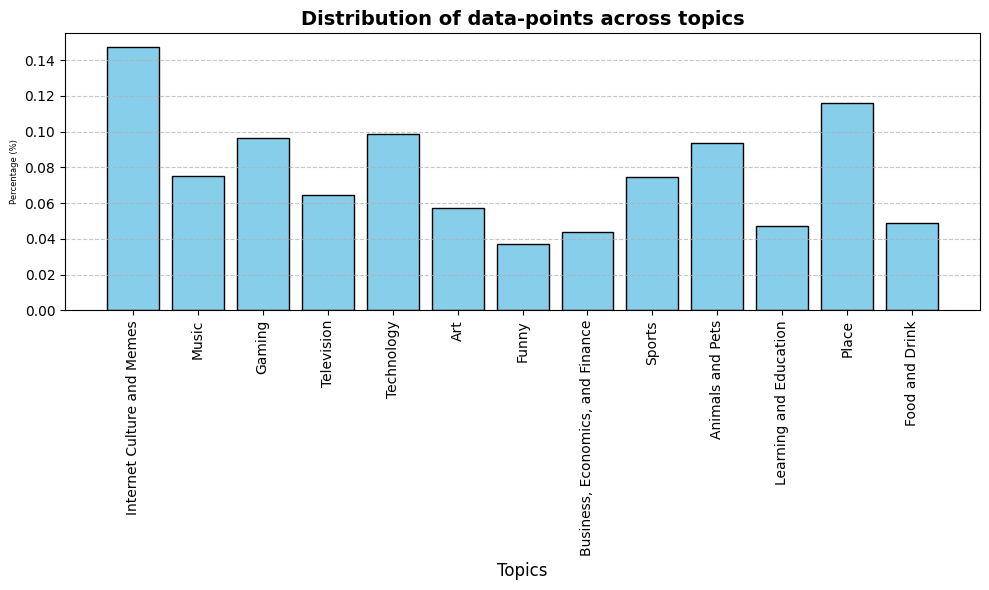

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(files_folder_percent.keys(), files_folder_percent.values(), color='skyblue', edgecolor='black')

# for bar in bars:
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

ax.set_title('Distribution of data-points across topics', fontsize=14, fontweight='bold')
ax.set_xlabel('Topics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=6)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [8]:
# sum of values in all_graphs
total = sum([len(files) for files in all_graphs.values()])
total

4032

In [11]:
def process_graphs(all_graphs, total_files_per_label):
    graphs = []
    labels = []
    for label, files in all_graphs.items():
        count = 0
        for file in files:
            print(f"Loading {file}")
            if count >= total_files_per_label:
                print(f"Loaded {total_files_per_label} files for {label}")
                break
            graph = nx.to_undirected(nx.read_graphml(file))
            mapping = {node: i for i, node in enumerate(graph.nodes())}
            graph = nx.relabel_nodes(graph, mapping)
            if len(graph.nodes) == 0:
                continue
            graphs.append(graphs)
            labels.append(label)

            count += 1
            
    return graphs, labels


In [ ]:
graphs, labels = process_graphs(all_graphs, 200)

Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/ThisLooksFun.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/heartwarming.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/ReactionMemes.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/jag_ivl.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/TwoSentenceHappiness.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/fail.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/meiaum.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/CollegeMemes.json.graphml
Loading /Users/arjuns/Downloads/notebooks_v2/v2/graphs/Internet Culture and Memes/UFOdocumentaries.json.graphml
Loading /Users/arjuns/Downloads/no

KeyboardInterrupt: 

In [3]:
import pickle
import numpy as np
from karateclub import Graph2Vec

def load_batch(batch_number):
    """
    Load a single batch of graph data and labels.
    """
    try:
        batch_file = f"graph_data_batch_{batch_number}.pkl"
        label_file = f"labels_batch_{batch_number}.pkl"
        
        with open(batch_file, 'rb') as f:
            graph_data = pickle.load(f)
        with open(label_file, 'rb') as f:
            labels = pickle.load(f)
        
        print(f"Loaded batch {batch_number} successfully.")
        return graph_data, labels
    except Exception as e:
        print(f"Error loading batch {batch_number}: {e}")
        return [], []

In [6]:
num_batches = 14
total_graphs = 4032
embedding_dim = 128
embeddings_ = np.zeros((total_graphs, embedding_dim))

# labels are strings
labels_ = np.empty(total_graphs, dtype=object)
model = Graph2Vec(dimensions=embedding_dim)
# Process each batch
current_index = 0
for batch in range(1, num_batches + 1):
    # Load current batch
    graph_data, labels = load_batch(batch)
    batchlen = len(graph_data)

    # Fit Graph2Vec model and get embeddings
    model.fit(graph_data)
    embeddings_batch = model.get_embedding()

    # Store embeddings and labels
    embeddings_[current_index:current_index + batchlen] = embeddings_batch
    labels_[current_index:current_index + batchlen] = labels

    # Update index for the next batch
    current_index += batchlen

print("Embeddings and labels processing complete.")


Loaded batch 1 successfully.
Loaded batch 2 successfully.
Loaded batch 3 successfully.
Loaded batch 4 successfully.
Loaded batch 5 successfully.
Loaded batch 6 successfully.
Loaded batch 7 successfully.
Loaded batch 8 successfully.
Loaded batch 9 successfully.
Loaded batch 10 successfully.
Loaded batch 11 successfully.
Loaded batch 12 successfully.
Loaded batch 13 successfully.
Loaded batch 14 successfully.
Embeddings and labels processing complete.


In [25]:
label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(labels)

for original, encoded in zip(labels, encoded_labels):
    print(f"Original: {original}, Encoded: {encoded}")

label_copy = labels.copy()
labels = encoded_labels

Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet Culture and Memes, Encoded: 6
Original: Internet C

In [27]:
np.save("../ds/v2/graph2vec_embeddings.npy", embeddings_)
np.save("../ds/v2/graph2vec_labels.npy", labels, allow_pickle=True)

In [9]:
embedding = np.load("./ds/v1/graph2vec_embeddings.npy")

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embedding)
def build_similarity_graph(embeddings, threshold):
    num_nodes = embeddings.shape[0]

    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i, embedding=embeddings[i])

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if similarity_matrix[i, j] >= threshold:
                G.add_edge(i, j, weight=similarity_matrix[i, j])

    return G

In [11]:
similarity_matrix

array([[1.        , 0.7409379 , 0.5737951 , ..., 0.44872543, 0.36127433,
        0.48586473],
       [0.7409379 , 0.9999997 , 0.729023  , ..., 0.3919107 , 0.37290943,
        0.41933838],
       [0.5737951 , 0.729023  , 1.        , ..., 0.3698831 , 0.21865796,
        0.3657365 ],
       ...,
       [0.44872543, 0.3919107 , 0.3698831 , ..., 1.        , 0.22380222,
        0.2182064 ],
       [0.36127433, 0.37290943, 0.21865796, ..., 0.22380222, 1.0000001 ,
        0.31034574],
       [0.48586473, 0.41933838, 0.3657365 , ..., 0.2182064 , 0.31034574,
        1.        ]], dtype=float32)

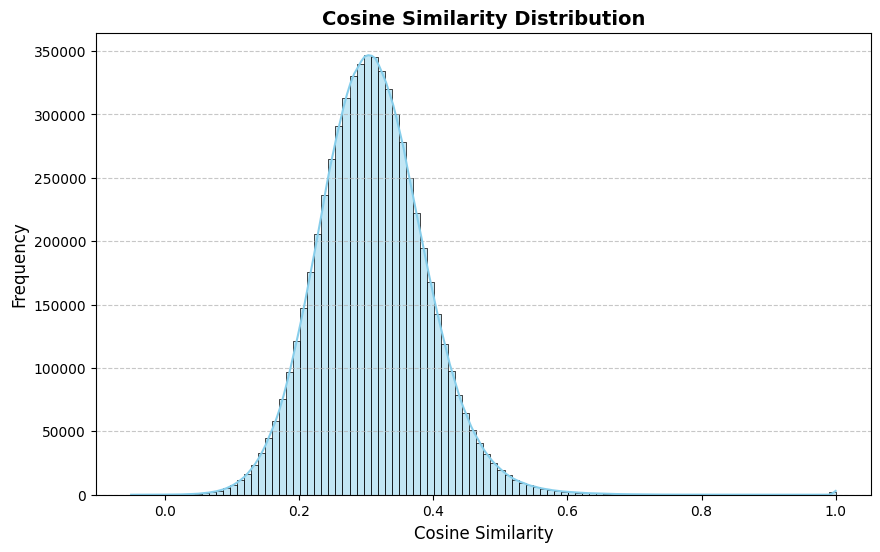

In [12]:
# find the range where 90% of the values lie
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(similarity_matrix.flatten(), bins=100, color='skyblue', kde=True)
plt.title('Cosine Similarity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
import numpy as np

def find_90_percent_range(matrix):
    # Flatten the matrix
    flattened = matrix.flatten()
    
    # Sort the values
    sorted_values = np.sort(flattened)
    
    # Find the 5th and 95th percentiles
    lower_bound = np.percentile(sorted_values, 2.5)
    upper_bound = np.percentile(sorted_values, 97.5)
    
    return lower_bound, upper_bound

lower, upper = find_90_percent_range(similarity_matrix)
print(f"Range where 95% of the values lie: ({lower}, {upper})")

Range where 90% of the values lie: (0.1611926257610321, 0.4739048182964325)


In [6]:
import numpy as np
import networkx as nx

thresholds = np.arange(0.05, 0.16, 0.01)
graphs = {}
for threshold in thresholds:
    print(f"Building graph for threshold {threshold}")
    G = build_similarity_graph(embedding, threshold)
    graphs[threshold] = G

Building graph for threshold 0.05
Building graph for threshold 0.060000000000000005
Building graph for threshold 0.07
Building graph for threshold 0.08000000000000002
Building graph for threshold 0.09000000000000001
Building graph for threshold 0.1
Building graph for threshold 0.11000000000000001
Building graph for threshold 0.12000000000000001
Building graph for threshold 0.13
Building graph for threshold 0.14
Building graph for threshold 0.15000000000000002


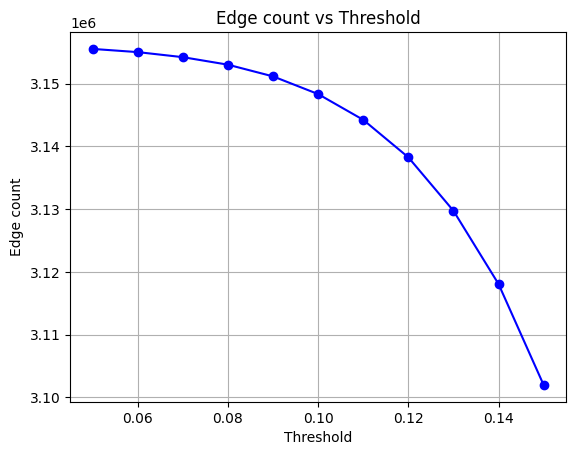

In [7]:
import matplotlib.pyplot as plt
# visualise edge count for each threshold
edge_counts = [len(G.edges()) for G in graphs.values()]
plt.plot(thresholds, edge_counts, marker='o', color='b')
plt.xlabel('Threshold')
plt.ylabel('Edge count')
plt.title('Edge count vs Threshold')
plt.grid()